In [93]:
%rm -rf __pycache__/ ../metrics/__pycache__

In [26]:
import sys, os
sys.path.append(os.path.abspath("../metrics/"))
import numpy as np
import bin_optimizer as bo
import place_from_map as pm
import matplotlib.pyplot as plt
import mplhep as hep
import ROC_curves
import cProfile
import tqdm


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x155373268690>, cbar=<matplotlib.colorbar.Colorbar object at 0x155373b45b50>, text=[])

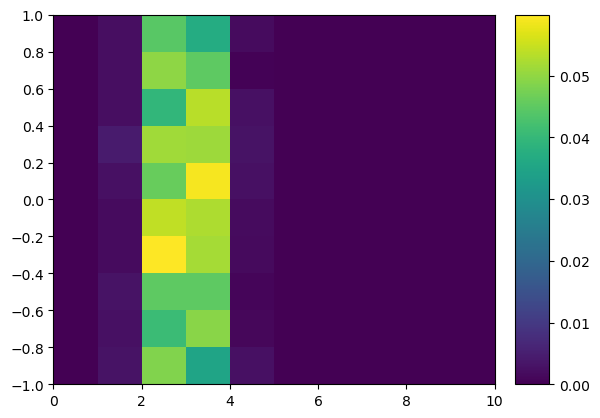

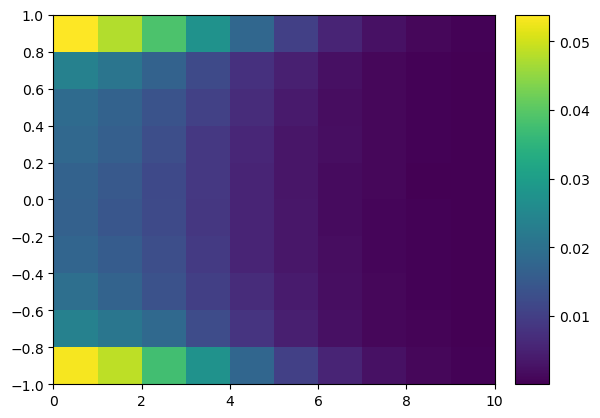

In [128]:
testing1 = np.hstack(
    (
        np.random.normal(3, 0.5, (20000,1)), 
        np.random.choice([-1, 1], size=(20000,1))*np.sinh(np.random.rand(20000,1)*2*np.pi)
    ),
)
testing1 = testing1[
    (testing1[:,0] > 0) & (testing1[:,0] < 10) & (testing1[:,1] > -1) & (testing1[:,1] < 1)
]


testing2 = np.hstack(
    (
        np.abs(np.random.normal(0, 3, (100000,1))),
        np.cos(np.random.rand(100000,1)*2*np.pi)
    )
)
testing2 = testing2[
    (testing2[:,0] > 0) & (testing2[:,0] < 10) & (testing2[:,1] > -1) & (testing2[:,1] < 1)
]

bins = np.linspace(0, 10, 11)
bins2 = np.linspace(-1,1,11)

signal, *_ = np.histogram2d(testing1[:,0], testing1[:,1], (bins, bins2))
signal = signal/np.sum(signal)
bkg, *_ = np.histogram2d(testing2[:,0], testing2[:,1], (bins, bins2))
bkg = bkg/np.sum(bkg)

plt.figure()
hep.hist2dplot(signal, bins, bins2)
plt.figure()
hep.hist2dplot(bkg, bins, bins2)

# ROC_curves.ROC_score(signal.astype(float), bkg.astype(float))

In [103]:
import importlib
importlib.reload(bo)

<module 'bin_optimizer' from '/scratch16/mswartz1/msrivas6/CMSSW_14_0_0/src/bin_merging/optimized_binning/merging/bin_optimizer.py'>

In [74]:
%rm .*.npy .*.hdf5

In [132]:
merger = bo.MergerNonlocal(
    (
        bins,
        bins2
    ),
    signal.copy(),
    bkg.copy(),
    map_at=(
        1800,
        1700,
        1600,
        1500,
        1300,
        1000,
        900,
        800,
        700,
        500,
        350,
        238,
        80,
        90,
        70,
        50, 
        60,
        10,
    )
)
# pr = cProfile.Profile()
# pr.enable()
new_bins = merger.run(3)
# pr.disable()
# pr.print_stats()
# print(new_bins)
# signalNew, _ = np.histogram(testing1, new_bins)
# bkgNew, _ = np.histogram(testing2, new_bins)
# hep.histplot([signalNew, bkgNew], new_bins);
# ROC_curves.ROC_score(signalNew.astype(float), bkgNew.astype(float))


Binning non-locally:: 100%|██████████| 97/97 [00:00<00:00, 7619.15it/s]


In [131]:
new_bins

array([[0.61849097, 0.3393553 , 0.04215374],
       [0.12985908, 0.19332239, 0.67681853]])

In [13]:
testing1

array([[  3.65317954,   3.50694751],
       [  2.28091959,  -6.26793383],
       [  2.46448041, -78.49589156],
       ...,
       [  3.18841124, -15.03969796],
       [  3.65494163, -28.02210442],
       [  2.94765112, -80.7955257 ]])

In [94]:
importlib.reload(ROC_curves)

<module 'ROC_curves' from '/scratch16/mswartz1/msrivas6/CMSSW_14_0_0/src/bin_merging/optimized_binning/metrics/ROC_curves.py'>

In [134]:
x = []
y = []

for i in tqdm.tqdm((None, 1800,1700,1600,1500,1300,1000,900,800,700,500,350,238,80,90,70,50, 60, 10,)):
    if i is None:
        _, _, score = ROC_curves.ROC_curve(signal.ravel(), bkg.ravel())
        x.append(len(signal.ravel()))
        y.append(score - 0.5)
    elif i > len(signal.ravel()):
        continue
    else:
        signal_counts = pm.place_array_nonlocal(i, testing1)
        signal_counts, _ = np.histogram(signal_counts, np.arange(i))
        signal_counts = signal_counts/signal_counts.sum()
        background_counts = pm.place_array_nonlocal(i, testing2)
        background_counts, _ = np.histogram(background_counts, np.arange(i))
        background_counts = background_counts/background_counts.sum()
        
        _, _, score = ROC_curves.ROC_curve(signal_counts, background_counts)
        x.append(i)
        y.append(score - 0.5)

x = list(reversed(x))
y = list(reversed(y))
# pm.place_array_nonlocal(900, testing1)

100%|██████████| 19/19 [00:01<00:00, 14.55it/s]


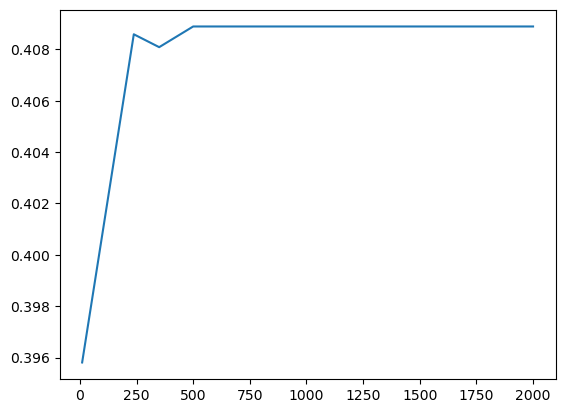

In [125]:
plt.plot(x, y)

In [139]:
x = []
y = []

for i in tqdm.tqdm((None, 1800,1700,1600,1500,1300,1000,900,800,700,500,350,238,80,90,70,50, 60, 10,)):
    if i is None:
        _, _, score = ROC_curves.length_scale_ROC(signal.ravel(), bkg.ravel())
        x.append(len(signal.ravel()))
        y.append(score - np.sqrt(2))
    elif i > len(signal.ravel()):
        continue
    else:
        signal_counts = pm.place_array_nonlocal(i, testing1)
        signal_counts, _ = np.histogram(signal_counts, np.arange(i))
        signal_counts = signal_counts/signal_counts.sum()
        background_counts = pm.place_array_nonlocal(i, testing2)
        background_counts, _ = np.histogram(background_counts, np.arange(i))
        background_counts = background_counts/background_counts.sum()
        
        _, _, score = ROC_curves.length_scale_ROC(signal_counts, background_counts)
        x.append(i)
        y.append(score - np.sqrt(2))

100%|██████████| 19/19 [00:00<00:00, 23.56it/s] 


In [142]:
y

[0.29539367864242894,
 0.2953936786424296,
 0.2953936786424294,
 0.2953936786424294,
 0.2953936786424294,
 0.2953936786424294,
 0.2801344009818483]

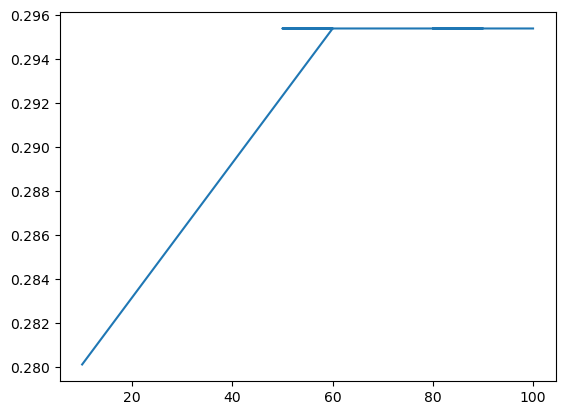

In [140]:
plt.plot(x, y)

In [84]:
pm.place_array_nonlocal(
    3,
    [
        [9,0],
        [4,0.9]
    ],
    verbose=True
)

Original indices
[[17  4]
 [ 7  8]]


array([0, 2], dtype=uint32)

In [135]:
import importlib
importlib.reload(bo)

<module 'bin_optimizer' from '/scratch16/mswartz1/msrivas6/CMSSW_14_0_0/src/bin_merging/optimized_binning/merging/bin_optimizer.py'>

Binning locally:: 100%|██████████| 6/6 [00:00<00:00, 3018.93it/s]

[[inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]
 [inf inf inf]]
5 6
[[0.00000000e+00 1.00000000e+00 1.21960615e+15]
 [1.00000000e+00 2.00000000e+00 1.05139458e+17]
 [2.00000000e+00 3.00000000e+00 6.67639729e+15]
 [3.00000000e+00 4.00000000e+00 1.30844621e+15]
 [4.00000000e+00 5.00000000e+00 2.43846963e+10]
 [5.00000000e+00 6.00000000e+00 0.00000000e+00]
 [6.00000000e+00 7.00000000e+00 0.00000000e+00]]
5 6
[[0.00000000e+00 1.00000000e+00 1.21960615e+15]
 [1.00000000e+00 2.00000000e+00 1.05139458e+17]
 [2.00000000e+00 3.00000000e+00 6.67639729e+15]
 [3.00000000e+00 4.00000000e+00 1.30844621e+15]
 [4.00000000e+00 5.00000000e+00 5.19539084e+10]
 [5.00000000e+00 6.00000000e+00 0.00000000e+00]]
5 6
[[0.00000000e+00 1.00000000e+00 1.21960615e+15]
 [1.00000000e+00 2.00000000e+00 1.05139458e+17]
 [2.00000000e+00 3.00000000e+00 6.67639729e+15]
 [3.00000000e+00 4.00000000e+00 1.30844621e+15]
 [4.00000000e+00 5.00000000e+00 6.51872811e+10]]


0.8084426712877234

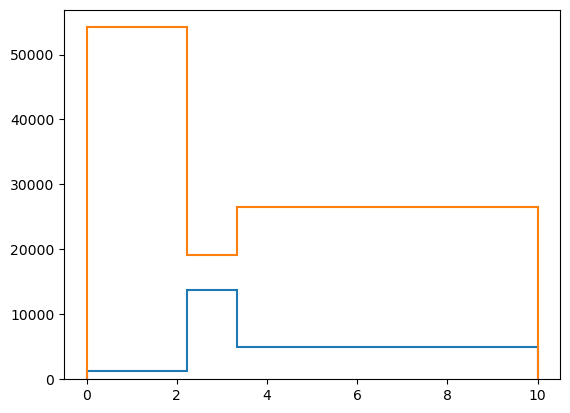

In [137]:
merger = bo.MergerLocal(
    bins.copy(),
    signal.copy(),
    bkg.copy()
)
new_bins = merger.run(3)
print(new_bins)
signalNew, _ = np.histogram(testing1, new_bins)
bkgNew, _ = np.histogram(testing2, new_bins)
hep.histplot([signalNew, bkgNew], new_bins)
ROC_curves.ROC_curve(signalNew.astype(float), bkgNew.astype(float))
